In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import svm, datasets

In [18]:
!unzip '/content/drive/MyDrive/IMDB Dataset.csv.zip'

Archive:  /content/drive/MyDrive/IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


##Loading the dataset

In [19]:
data = pd.read_csv("/content/IMDB Dataset.csv")

data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


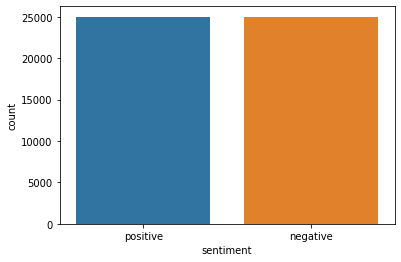

In [20]:
sns.countplot(data['sentiment'])

###Preprocessing the dataset

In [21]:
def lower_text(row):

    return row.lower()

 

def clean_text(text):
    tokens = re.split('\W+', text)
    text = " ".join(word  for word in tokens  if word not in string.punctuation)
    return text

In [22]:
data["review"] = data["review"].apply(lower_text)

In [23]:
data["review"] = data["review"].apply(clean_text)

In [24]:
data["sentiment"] = data["sentiment"].map(lambda  i : 1 if i=="positive" else -1)

In [25]:
neg_data = data[data['sentiment']==-1]


In [26]:
neg_data.shape

(25000, 2)

In [27]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,-1
4,petter mattei s love in the time of money is a...,1
5,probably my all time favorite movie a story of...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative idea...,-1
8,encouraged by the positive comments about this...,-1
9,if you like original gut wrenching laughter yo...,1


In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
X_train,X_test,y_train,y_test = train_test_split(data["review"],data["sentiment"], test_size = 0.2, random_state = 10)

In [61]:
X_train.shape

(40000,)

In [14]:
y_train.shape

(40000,)

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [83]:
#Importing required module
import numpy as np
from nltk.tokenize import  word_tokenize 
 
#Example text corpus for our tutorial
# text = ['Topic sentences are similar to mini thesis statements.\
#         Like a thesis statement, a topic sentence has a specific \
#         main point. Whereas the thesis is the main point of the essay',\
#         'the topic sentence is the main point of the paragraph.\
#         Like the thesis statement, a topic sentence has a unifying function. \
#         But a thesis statement or topic sentence alone doesn’t guarantee unity.', \
#         'An essay is unified if all the paragraphs relate to the thesis,\
#         whereas a paragraph is unified if all the sentences relate to the topic sentence.']
 
#Preprocessing the text data
sentences = []
word_set = []
 
for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

In [84]:
from nltk.stem import PorterStemmer
class DataPreprocessing:
  
  def _remove_html(self, data):
    for i in range(len(data)) :
      p = re.compile(r'<.*?>')
      data[i] = p.sub('', data[i])
      
    return data

  #lowercase
  def _convert_to_lower_case(self,data):
    for i in range(len(data)):
      data[i] = data[i].lower()
    return data  

  #single characters
  def _remove_single_characters(self, data):
    for i in range(len(data)) :  
      data[i] = " ".join([w for w in data[i].split() if len(w)>1]) 
    return data 

   #punctuation  
  def _remove_punctuation(self,data):
    symbols = "!,\"#$%&()*+-./:;<=>?@[\]^_`{|}~'\n"
    for symbol in symbols:
      for i in range(len(data)):
        data[i] = data[i].replace(symbol,"")
    return data  

  #stemming  
  def _stem(self,data):
    ps = PorterStemmer ()
    
    for i in range(len(data)) :
      new_doc = ""
      for word in data[i].split():
        new_doc+= ps.stem(word)+" "
      data[i] = new_doc  
    return data   
  
  def preprocess(self,data):
     data = self._remove_html(data)
     data = self._remove_single_characters(data)
     data = self._convert_to_lower_case(data)
     data = self._remove_punctuation(data)
     data = self._stem(data)

     return data

In [123]:
pre = DataPreprocessing()
data['review'] = (pre.preprocess(list(data["review"])))
# y = np.array(data['sentiment'].iloc[:40])
# sentences = text
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,1
1,wonder littl product br br the film techniqu i...,1
2,thought thi wa wonder way to spend time on too...,1
3,basic there famili where littl boy jake think ...,-1
4,petter mattei love in the time of money is vis...,1


In [124]:
text = list(data["review"])

In [125]:
#Importing required module
import numpy as np
from nltk.tokenize import  word_tokenize 
 
 
#Preprocessing the text data
sentences = []
word_set = []
 
for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

In [ ]:
#Create a count dictionary
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
word_count = count_dict(sentences)

In [112]:
#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

In [113]:
#Inverse Document Frequency
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)


In [114]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
         
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec

In [115]:
def User_tf_idf(rows):
  return tf_idf(rows)

In [119]:
index_dict

{'wilderbeast': 0,
 'addit': 1,
 'obscur': 2,
 'citi': 3,
 'probabl': 4,
 'pivot': 5,
 'clich': 6,
 'fail': 7,
 'gut': 8,
 'wwwaaaaayyyyy': 9,
 'nonchal': 10,
 'humour': 11,
 'hope': 12,
 'shakespear': 13,
 'dangl': 14,
 'janet': 15,
 'lopez': 16,
 'deadli': 17,
 'between': 18,
 'roof': 19,
 'bore': 20,
 'fight': 21,
 'twelv': 22,
 'seamless': 23,
 'kill': 24,
 'sticker': 25,
 'mysteri': 26,
 'diminish': 27,
 'disgruntl': 28,
 'swiss': 29,
 'repercuss': 30,
 'hair': 31,
 'gear': 32,
 'vision': 33,
 'encourag': 34,
 'maintain': 35,
 'nasti': 36,
 'type': 37,
 'lab': 38,
 'crook': 39,
 'refer': 40,
 'parallel': 41,
 'burn': 42,
 'recal': 43,
 'grew': 44,
 'subject': 45,
 'dri': 46,
 'fiver': 47,
 'love': 48,
 'alcohol': 49,
 'under': 50,
 'small': 51,
 'unorigin': 52,
 'pronounc': 53,
 'sermon': 54,
 'appar': 55,
 'poop': 56,
 'jew': 57,
 'hail': 58,
 'confeder': 59,
 'front': 60,
 'dement': 61,
 'variat': 62,
 'environ': 63,
 'jesu': 64,
 'ventur': 65,
 'grain': 66,
 'simpli': 67,
 'sam

In [116]:
data["review"] = data["review"].apply(User_tf_idf)

KeyError: ignored

In [91]:
#TF-IDF Encoded text corpus
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)
print(np.array(vectors).shape)

(40, 2063)


In [92]:
!pip install cvxopt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers

In [93]:
def SvmOptim(X, y):
  m,n = X.shape
  y = y.reshape(-1,1) * 1.
  X_dash = y * X
  H = np.dot(X_dash , X_dash.T) * 1

  #Converting into cvxopt format
  P = cvxopt_matrix(H)
  q = cvxopt_matrix(-np.ones((m, 1)))
  G = cvxopt_matrix(-np.eye(m))
  h = cvxopt_matrix(np.zeros(m))
  A = cvxopt_matrix(y.reshape(1, -1))
  b = cvxopt_matrix(np.zeros(1))
  solution = solvers.qp(P, q, G, h, A, b)
  alpha = np.array(solution['x'])
  w = ((alpha * y).T @X).reshape(-1, 1)
  seuil = 0.0
  s = (alpha > seuil).flatten()
  b = y[s] - np.dot(X[s], w)
  return w, b 

In [94]:
X= np.array(vectors)

In [95]:
print(X.shape,y.shape)

(40, 2063) (40,)


In [98]:
w,b = SvmOptim(X,y)
print(w)
print(b.shape,w.shape)

     pcost       dcost       gap    pres   dres
 0: -3.8418e+01 -8.0039e+01  4e+01  4e-16  2e+00
 1: -8.6899e+01 -9.1980e+01  5e+00  4e-15  1e+00
 2:  7.8693e+03 -1.5178e+04  2e+04  4e-13  2e-15
 3: -1.5686e+02 -3.4121e+03  3e+03  1e-13  9e-16
 4: -9.4866e+02 -1.3178e+03  4e+02  7e-14  4e-16
 5: -9.8489e+02 -1.0029e+03  2e+01  1e-13  2e-16
 6: -9.8520e+02 -9.8543e+02  2e-01  6e-14  2e-16
 7: -9.8520e+02 -9.8520e+02  2e-03  7e-14  2e-16
 8: -9.8520e+02 -9.8520e+02  2e-05  8e-14  2e-16
Optimal solution found.
[[ 0.39931116]
 [-0.62495663]
 [ 0.36881194]
 ...
 [-0.95481784]
 [-0.95257848]
 [ 0.57867686]]
(40, 1) (2063, 1)


In [ ]:
v = CountVectorizer()
v.fit(X_train)  #build vocabulary from the messages in the data

In [ ]:
train_df = v.transform(X_train)
test_df = v.transform(X_test)

In [ ]:
train_df.shape

In [ ]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_df,y_train)

In [ ]:
predictions= model.predict(test_df)
accuracy_score(y_test,predictions)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(train_df, y_train)

In [ ]:
X = train_df
y = np.array(y_train)

In [ ]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
print(X.shape,y.shape)
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])